In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from finsim.data import get_yahoofinance_data

from lppl.fit import LPPLModel

In [2]:
symdf = get_yahoofinance_data('^GSPC', '2017-01-01', '2018-08-01')

[*********************100%***********************]  1 of 1 completed


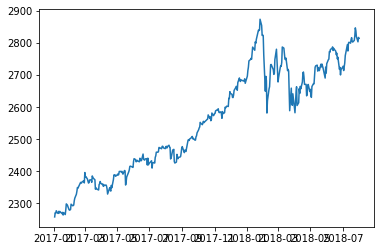

In [3]:
plt.plot(symdf['TimeStamp'], symdf['Close'])

In [4]:
fitted_lppl_model = LPPLModel()
fitted_lppl_model.omega_lo = 6 / (24*3600.)
fitted_lppl_model.omega_hi = 13 / (24*3600.)

fitted_lppl_model.fit(symdf['TimeStamp'].map(lambda ts: ts.timestamp()), symdf['Close'])

/Users/stephenhky/opt/anaconda3/envs/finance/lib/python3.8/site-packages/lppl/fit.py:40: OptimizeWarning: Initial guess is not within the specified bounds
  sol = minimize(


In [5]:
print(fitted_lppl_model)

tc: 1556659191.63195
m: 0.5361008636245815
omega: 0.00015046296296296297
A: 7.35903665574177
B: -0.01983298160174574
C: 0.24348769822879363
phi: -1.4864361009599683


In [6]:
pd.Timestamp.fromtimestamp(fitted_lppl_model.tc)

Timestamp('2019-04-30 17:19:51.631950')

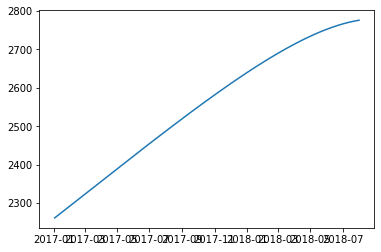

In [7]:
plt.plot(symdf['TimeStamp'], fitted_lppl_model(symdf['TimeStamp'].map(lambda ts: ts.timestamp())))

In [8]:
symdf['TimeStamp'].map(lambda ts: ts.timestamp()).map(lambda f: pd.Timestamp.fromtimestamp(f))

Date
2017-01-03   2017-01-02 19:00:00
2017-01-04   2017-01-03 19:00:00
2017-01-05   2017-01-04 19:00:00
2017-01-06   2017-01-05 19:00:00
2017-01-09   2017-01-08 19:00:00
                     ...        
2018-07-26   2018-07-25 20:00:00
2018-07-27   2018-07-26 20:00:00
2018-07-30   2018-07-29 20:00:00
2018-07-31   2018-07-30 20:00:00
2018-08-01   2018-07-31 20:00:00
Name: TimeStamp, Length: 398, dtype: datetime64[ns]